Simulación procesos Random Walk y ARIMA (p,d,q)

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import statistics as st
import random as rd

Bajamos el índice del mercado financiero mexicano (IPyC)

In [ ]:
tickmkt = "^MXX"

mxx = yf.download(tickers=tickmkt, start = "2000-01-01", interval = "1d")
# Seleccionamos el índice ajustado:
mxx = mxx['Adj Close']
mxx

[*********************100%%**********************]  1 of 1 completed


Date
2000-01-03     7077.709961
2000-01-04     6675.270020
2000-01-05     6764.310059
2000-01-06     6751.649902
2000-01-07     7047.089844
                  ...     
2023-10-10    50289.859375
2023-10-11    50344.738281
2023-10-12    49745.160156
2023-10-13    49379.578125
2023-10-16    49634.031250
Name: Adj Close, Length: 5974, dtype: float64

Estimar el parametro del drift utilizando el valor del logaritmo del día 1 y del último día

In [ ]:
lnmxx = np.log(mxx)
N = len(lnmxx)

phi0 = (lnmxx[-1]-lnmxx[0])/N
phi0

0.00032603386488698

In [ ]:
#Serie no estacionaria
#Estimamos la volatilidad (desv estándar) del error:
sigma = np.std(lnmxx)/ np.sqrt(N)
sigma

# El valor inicial:
y0 = lnmxx[0]
phi1 = 1

# Ahora simulo todos los días siguiendo la ecuación (a partir del día 0):
# Ysimln[t] = y0 + (phi1) * Ysimln[t-1] + error
ysimln = []
ysimln.append(y0)
for i in range (1,N):
  error = np.random.normal(0,sigma)
  ysimln.append(phi0 + phi1 * ysimln[i-1] + error)

ysim = np.exp(ysimln)
print(ysim)

[ 7077.70996094  7046.53257016  7149.02897983 ... 20264.42531455
 20182.16775044 20412.23372505]


In [ ]:
#Serie estacionaria
#Estimamos la volatilidad (desv estándar) del error:
sigma = np.std(lnmxx)/ np.sqrt(N)
sigma

# El valor inicial:
#y0 = lnmxx[0]
#phi1 = 0.9
phi1 =0.99

# Ahora simulo todos lod días siguiendo la ecuación (a partir del día 0):
# Ysimln[t] = y0 + (phi1) * Ysimln[t-1] + error
ysimln = []
ysimln.append(0.1)
for i in range (1,N):
  error = np.random.normal(0,sigma)
  ysimln.append(phi0 + phi1 * ysimln[i-1] + error)

#ysim = np.exp(ysimln)
#print(ysim)

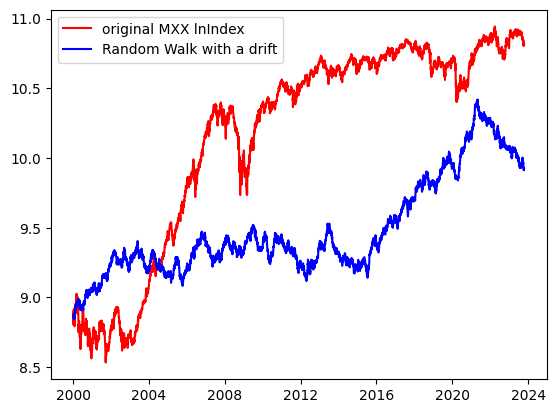

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import*

ysim = pd.DataFrame(lnmxx)
ysim['ysimln'] = ysimln
ysim

plot (ysim['Adj Close'], color='r')
plot (ysim['ysimln'], color='b')
legend(['original MXX lnIndex', 'Random Walk with a drift'])

plt.show()

ARIMA-AR(1)

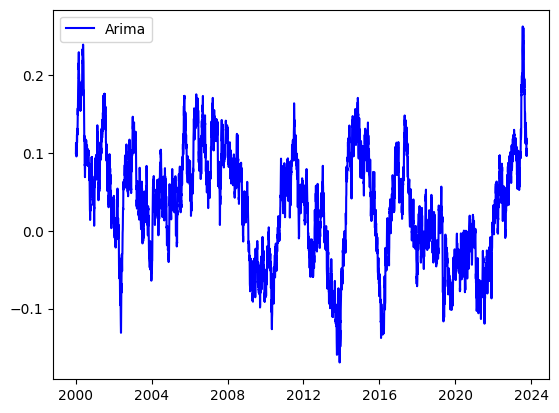

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import*

#Stationary
ysim = pd.DataFrame(lnmxx)
ysim['ysimln'] = ysimln
ysim

plot (ysim['ysimln'], color='b')
legend(['Arima'])

plt.show()

-----------------------------------------------------

# Calibration Steps for ARIMA-SARIMA

You have to design an ARIMA-SARIMA model to forecast the Querétaro “Indice de Actividad Industrial”. INEGI publishes a monthly index of the industrial activity for each state and at the national level. You can download this index Googling it (“inegi bie índice de actividad industrial Querétaro”)

* Calibrate an ARIMA-SARIMA model for this index. Follow the calibration steps explain in class (HEREis a document with the calibration process).

* You have to document your data management steps and the calibration process

* You have to CLEARLY INTERPRET the final calibrated model with YOUR WORDS

* You have to forecast the industrial index for Querétaro up to 2030. What is the expected average annual growth for 6-7 years?

In [2]:
# Run these lines to connect to your Drive folder

from google.colab import drive

drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive/AI/Statistics"
!ls

Mounted at /content/gdrive
/content
/content/gdrive/MyDrive/AI/Statistics
'Calibration Steps for ARIMA-SARIMA.ipynb'   iaiqro.csv   iaiqro.gsheet


In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

In [4]:
df = pd.read_csv('iaiqro.csv', parse_dates=['Periodos'], index_col='Periodos')
df

,iaiqro
Periodos,
2003/01,65.234491
2003/02,64.750420
2003/03,61.444991
2003/04,64.953065
2003/05,59.522348
...,...
2023/02,89.168194
2023/03,103.384331
2023/04,91.876916


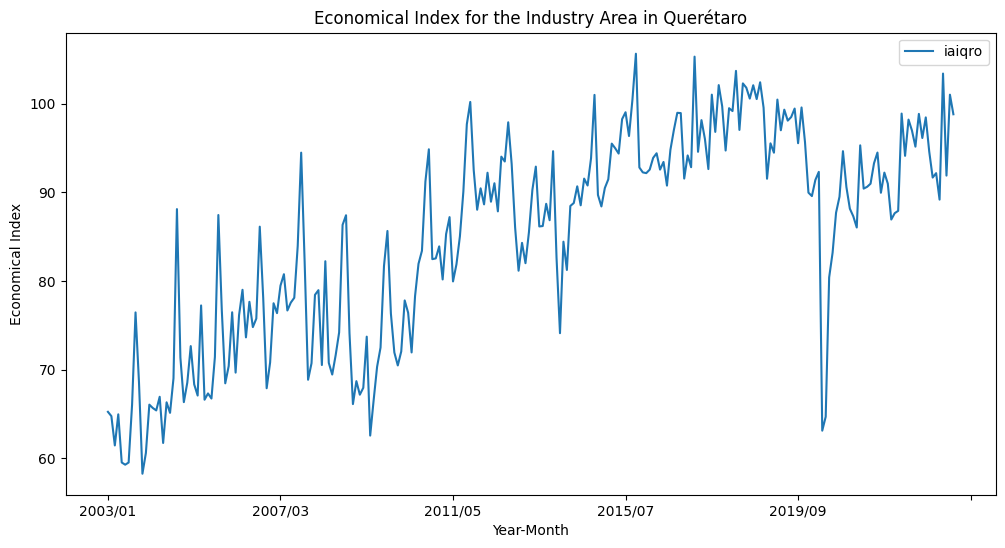

In [5]:
df.plot(figsize=(12, 6))
plt.xlabel('Year-Month')
plt.ylabel('Economical Index')
plt.title('Economical Index for the Industry Area in Querétaro')
plt.show()

# SEASONALITY

In [6]:
df['log'] = np.log(df['iaiqro'])

In [29]:
df

,iaiqro,log,Annual
Periodos,,,
2003/01,65.234491,4.177988,NaN
2003/02,64.750420,4.170540,NaN
2003/03,61.444991,4.118142,NaN
2003/04,64.953065,4.173665,NaN
2003/05,59.522348,4.086352,NaN
...,...,...,...
2023/02,89.168194,4.490524,0.014323
2023/03,103.384331,4.638453,0.044631
2023/04,91.876916,4.520450,-0.023967


WE OUGHT TO PERFORM THE DICKY FULLER TEST

In [7]:
dicky_fuller_test = adfuller(df['log'])

# Print the test statistic and p-value
print('ADF Statistic:', round(dicky_fuller_test[0],4))
print('p-value:', round(dicky_fuller_test[1],4))

ADF Statistic: -2.0403
p-value: 0.2692


In order to assess if the the data we are analysing is in fact stationary, we can use the Dickey-Fuller test. This test is essential since it is a tool for analysing the stationarity of time series. Its usefulness lies in its ability to test the null hypothesis of unit root against the alternative of stationarity.

By calculating the contrast statistic and the associated p-value, we can determine whether or not to reject the null hypothesis. Thus, p-values below the usual significance levels (0.05) suggest rejecting the null hypothesis and concluding that the series is stationary.

In this case, the Dickey-Fuller test reported the calculated statistic is -2.0403 and the associated p-value is 0.2692.

With this information, we should recall that the null hypothesis of this test states that the time series is non-stationary. **Since the p-value is greater than 0.05, we cannot reject the null hypothesis at the usual 5% significance level.**

__In conclusion, at the 95% confidence level, we do not find sufficient evidence to reject the null hypothesis of unit root using the ADF test. The results suggest that the time series is not stationary and possesses characteristics of non-stationary series__

In [26]:
df['Annual']= df['log'] - np.log(df['iaiqro']).shift(12)
df

,iaiqro,log,Annual
Periodos,,,
2003/01,65.234491,4.177988,NaN
2003/02,64.750420,4.170540,NaN
2003/03,61.444991,4.118142,NaN
2003/04,64.953065,4.173665,NaN
2003/05,59.522348,4.086352,NaN
...,...,...,...
2023/02,89.168194,4.490524,0.014323
2023/03,103.384331,4.638453,0.044631
2023/04,91.876916,4.520450,-0.023967


In [23]:
df_temp = df.copy()
df_temp = df_temp.dropna()
df_temp

,iaiqro,log,Annual
Periodos,,,
2004/01,66.045678,4.190347,0.012358
2004/02,65.668412,4.184618,0.014078
2004/03,65.394662,4.180441,0.062298
2004/04,66.930978,4.203662,0.029997
2004/05,61.722965,4.122656,0.036304
...,...,...,...
2023/02,89.168194,4.490524,0.014323
2023/03,103.384331,4.638453,0.044631
2023/04,91.876916,4.520450,-0.023967


In [28]:
dicky_fuller_test = adfuller(df_temp['Annual'])
print('p-value:', round(dicky_fuller_test[1],5))

p-value: 0.01098


By subtracting the value of the time series 12 periods ago, we can remove the effect of seasonality that occurs on an annual basis.

The column "Annual" is the seasonally adjusted values of the time series. The Augmented Dickey-Fuller (ADF) test is then applied to the 'Annual' column to test for stationarity. __The p-value of the ADF test is 0.01098, which is less than the significance level of 0.05. Therefore, we can reject the null hypothesis that the time series is non-stationary and conclude that the time series is stationary.__

# Summary of autocorrelation levels

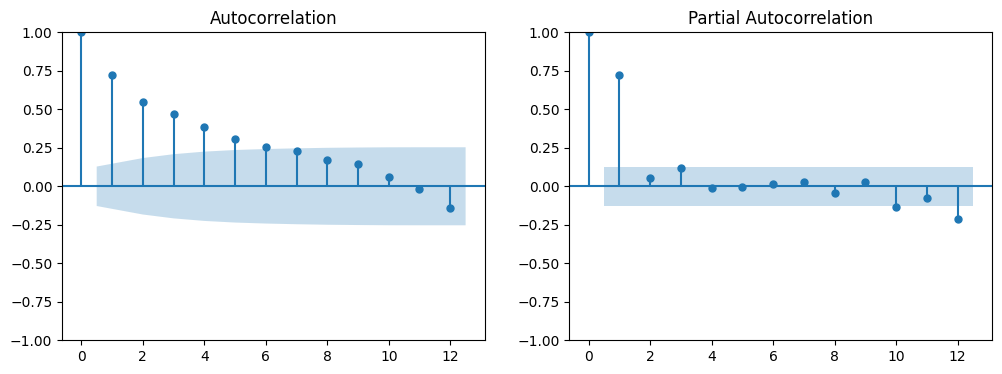

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# Plot the ACF of the time series in the first subplot
plot_acf(df_temp['Annual'].dropna(), lags=12, ax=axs[0])
# Plot the PACF of the time series in the second subplot
plot_pacf(df_temp['Annual'].dropna(), lags=12, ax=axs[1])

plt.show()


In the ACF plot we can observe that the first 6 autocorrelations are statistically significant and positive. This shows the annual growth of Queretaro's industrial activity index is positively correlated with its own annual growth in the previous 6 months. We could infer that if the index is growing in one month, it is more likely to continue growing in the following 6 months. Then there's a steady decline after the 6th lag.



### Interpretation of PACF

The PACF plot shows that only the first lag is positive and significant. This means that there is a direct effect of the annual growth in the previous month on its current annual growth.
This is consistent with the ACF plot, which shows that the annual growth of the industrial activity index is strongly correlated with its own annual growth in the previous first months. However, the PACF plot suggests that this correlation is primarily due to the direct effect of the annual growth in the previous month.
The annual growth in previous months has little or no additional predictive power for the current annual growth, once we takin into account the effect of the annual growth in the previous month.

### Further Interpretation of the ACF

The annual growth of Queretaro's industrial activity index is 75% correlated with its own annual growth in the previous month, using the ACF plot.

This means that the annual growth of the industrial activity index in a given month is 75% predictable by its own annual growth in the previous month. In other words, if the industrial activity index grew by 5% in the previous month, we can expect it to grow by an average of 3.75% in the current month.

  
Based on the ACF plot, the annual growth of Queretaro's industrial activity index is 65% correlated with its own annual growth in the two months previous.

This means that the annual growth of the industrial activity index in a given month is 65% predictable by its own annual growth in the two months previous. In other words, if the industrial activity index grew by 5% in the two months previous, we can expect it to grow by an average of 3.25% in the current month.

# ARIMA-SARIMA 1

In [50]:
D = 1
d = 0

In [51]:
p = 1
q = 0

In [52]:
P = 0
Q = 0

In [53]:
model = sm.tsa.statespace.SARIMAX(df['log'], order=(p,d,q), seasonal_order = (P,D,Q,12), trend='c',  simple_differencing=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [54]:
model_sarimax = model.fit(disp = 0)
print(model_sarimax.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           DS12.log   No. Observations:                  234
Model:             SARIMAX(1, 0, 0)x(0, 0, 0, 12)   Log Likelihood                 331.391
Date:                            Tue, 07 Nov 2023   AIC                           -656.782
Time:                                    21:47:04   BIC                           -646.416
Sample:                                         0   HQIC                          -652.602
                                            - 234                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0059      0.004      1.524      0.128      -0.002       0.013
ar.L1          0.7202      0.034   

## Intercept
The intercept of 0.0059 in the  SARIMAX model suggests that the industrial activity index is still expected to grow by an average of 0.59% per month over the long run.


The z-value is a statistical measure of how many standard deviations a value is away from the mean.
The z-value associated with a coefficient is a measure of how statistically significant the coefficient is. A high z-value indicates that the coefficient is statistically significant, meaning that it is unlikely to be due to chance.

A z-value greater than 1.96 indicates that the coefficient is statistically significant at a 95% confidence level.

The z-value associated with the intercept in the SARIMAX model is 1.524.
This value is not greater than 1.96. This means that the intercept is not statistically significant at a 95% confidence level.

However, the z-value of 1.524 is still relatively high, and it is possible that the intercept is statistically significant at a lower confidence level, such as a 90% confidence level. To determine this, we would need to calculate the p-value associated with the intercept coefficient.

## ar.L1

The AR(1) coefficient of 0.7202 means that the growth today is highly related to the growth in the previous time period. Specifically, it suggests that about 72% of the growth we see now can be explained by the growth we saw before. So the growth tends to keep going in the same direction - if it was high before, it likely stays high. This shows the data is quite persistent and predictable based on its own past values.

We can basically infer that the current growth is largely determined by the previous growth, which tells us growth patterns tend to stick around.

the z-value associated with the ar.L1 coefficient is 21.252.

This value is  greater than 1.96. This means that the intercept is  statistically significant at a 95% confidence level.

The fact that the z-value associated with the ar.L1 coefficient is so high suggests that the ar.L1 coefficient is very precisely estimated. This means that we can be very confident in the strength of the momentum in the growth of the industrial activity index.



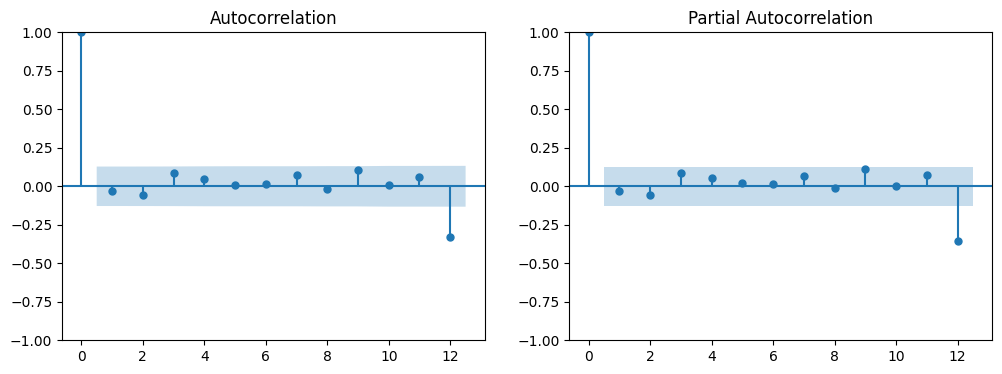

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(model_sarimax.resid, lags = 12, ax=axs[0])
plot_pacf(model_sarimax.resid, lags = 12, ax=axs[1])

plt.show()


In the ACF plot we can observe that the last autocorrelation (12th) is statistically significant and negative.

This does not assimilate the white noise we are looking for still.

It seems like there's still some autocorrelation left in the residuals of the current model. One thing we could try is adding an MA(1) term by setting Q=1 in the seasonal order of the SARIMAX model.

What this would do is include a moving average component that uses the lag 1 forecast error. So the current prediction will be influenced by the previous time period's random shock or residual.


# SARIMA 2

In [56]:
d = 0
D = 1
p = 1
P = 0
q = 0
Q = 1

In [60]:
model_v2 = sm.tsa.statespace.SARIMAX(df['log'], order=(p,d,q), seasonal_order = (P,D,Q,12), trend='c',  simple_differencing=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [61]:
model_sarimax_v2 = model_v2.fit(disp = 0)
print(model_sarimax_v2.summary())

                                      SARIMAX Results                                       
Dep. Variable:                             DS12.log   No. Observations:                  234
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 359.050
Date:                              Tue, 07 Nov 2023   AIC                           -710.101
Time:                                      22:17:36   BIC                           -696.279
Sample:                                           0   HQIC                          -704.528
                                              - 234                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0043      0.002      2.626      0.009       0.001       0.007
ar.L1          0.77

## Intercept
The intercept of 0.0043 in the  SARIMAX model suggests that the industrial activity index is still expected to grow by an average of 0.43% per month over the long run.


The z-value of the intercept is 2.626, which is statistically significant at a 95% confidence level. This means that we can be confident that the intercept is not due to chance.


## ar.L1

The AR(1) coefficient of 0.7772 in the SARIMAX model suggests that the current growth rate of the industrial activity index is 77.72% predictable by its own lagged growth rate. This is a very high AR(1) coefficient, which suggests that there is a very strong momentum in the growth of the industrial activity index.

The z-value of the AR(1) coefficient is 25.338, which is statistically significant at a 99.99% confidence level. This means that we can be very confident that the AR(1) coefficient is not due to chance.

## ma.S.L12

The MA(12) coefficient in the SARIMAX model represents the effect of the error term in the previous 12 months on the current growth rate of the industrial activity index.

The MA(12) coefficient of -0.5819 in the SARIMAX model suggests that the error term in the previous 12 months has a negative effect on the current growth rate of the industrial activity index. This means that if the error term was high in the previous 12 months, we can expect the current growth rate of the industrial activity index to be lower.

The z-value of the MA(12) coefficient is -13.252, which is statistically significant at a 99.99% confidence level.

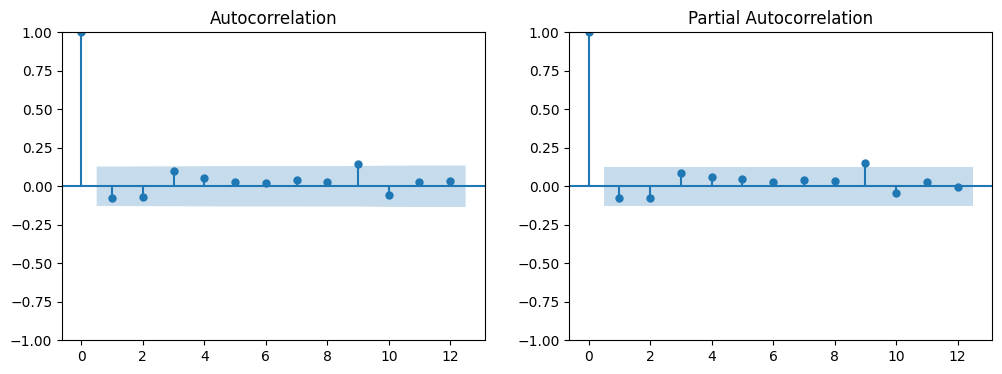

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(model_sarimax_v2.resid, lags = 12, ax=axs[0])
plot_pacf(model_sarimax_v2.resid, lags = 12, ax=axs[1])

plt.show()

We can observe that the autocorrelation and partial autocorrelation plots of the errors from the second model, it seems like we've got white noise now.

This suggests we've improved the model to the point where the errors are nice and random, which is a good sign. It means the updated model has soaked up all the systematic patterns, leaving only random white noise errors behind. And random error is what we want to see for a well-fitting time series model.

 # Forecast the industrial index for Querétaro up to 2030.

In [83]:
d = 0
D = 1
p = 1
P = 0
q = 0
Q = 1

In [84]:
model_v3 = sm.tsa.statespace.SARIMAX(df['iaiqro'], order=(p,d,q), seasonal_order = (P,D,Q,12), trend='c')
model_sarimax_final = model_v3.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [91]:
future_dates = pd.date_range(start='2023-07-01', end='2030-12-01', freq='MS')

In [109]:
forecast_values = model_sarimax_final.forecast(steps=90)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [122]:
future_dates = pd.date_range(start='2023-07-01', end='2030-12-01', freq='MS')
forecast_df = pd.DataFrame({'Periodos': future_dates, 'iaiqro': forecast_values})
complete_df = pd.concat([df, forecast_df]).reset_index(drop=True)

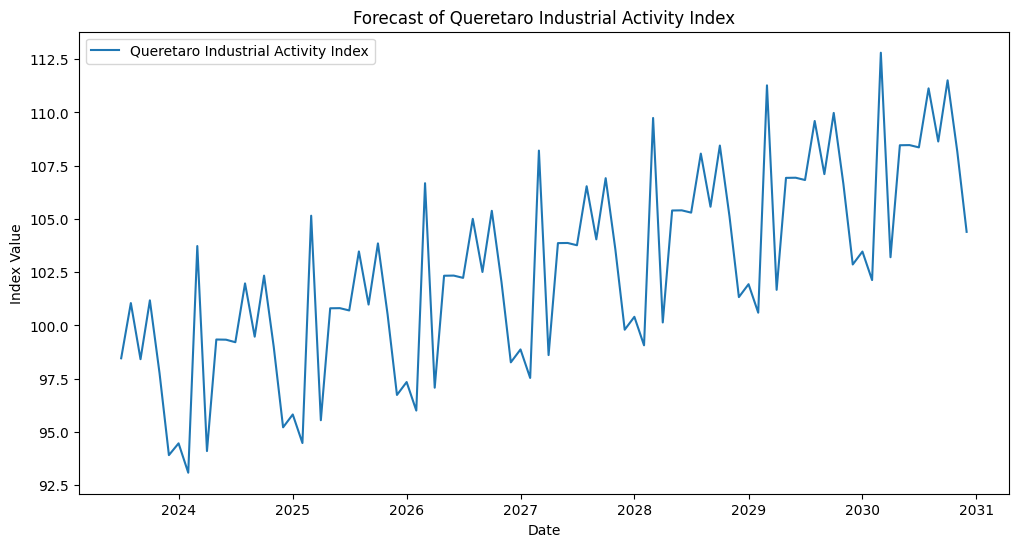

In [123]:
plt.figure(figsize=(12,6))
plt.plot(complete_df['Periodos'], complete_df['iaiqro'], label='Queretaro Industrial Activity Index')
plt.title('Forecast of Queretaro Industrial Activity Index')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend(loc='upper left')
plt.show()

In [146]:
complete_df.iloc[245:].head(10)

,iaiqro,log,Annual,Periodos
245,98.793566,4.593032,0.018766,NaT
246,98.456867,NaN,NaN,2023-07-01
247,101.049384,NaN,NaN,2023-08-01
248,98.414575,NaN,NaN,2023-09-01
249,101.176477,NaN,NaN,2023-10-01
250,97.753003,NaN,NaN,2023-11-01
251,93.909945,NaN,NaN,2023-12-01
252,94.463962,NaN,NaN,2024-01-01
253,93.084124,NaN,NaN,2024-02-01
254,103.726666,NaN,NaN,2024-03-01


In [148]:
df.tail(20)

,iaiqro,log,Annual
Periodos,,,
2021/11,90.964976,4.510475,0.004153
2021/12,86.922725,4.465020,-0.013961
2022/01,87.639238,4.473229,0.004091
2022/02,87.900125,4.476201,0.021608
2022/03,98.871672,4.593823,0.036907
2022/04,94.105513,4.544417,0.040075
2022/05,98.192222,4.586927,0.080360
2022/06,96.956894,4.574266,0.063795
2022/07,95.142141,4.555372,0.019912


## _What is the expected average annual growth for 6-7 years?_

The expected average annual growth for 6-7 years can be calculated using the compound annual growth rate (CAGR) formula. The CAGR is a measure of the average annual growth rate of an investment over a specified period of time.

$$ CAGR = ((Ending Value / Beginning Value)^(1/n)) - 1 $$

_Beginning and ending of 2023_

CAGR = ((93.909945	 / 92.152168	)^(1/7)) - 1

CAGR = ((93.909945 / 92.152168)^(1/7)) - 1
CAGR = (1.019047^(1/7)) - 1
CAGR = 0.0027 or 0.27%

Therefore, the CAGR for the given data is 0.27%. Which would reflect the average annual growth for 7 years which would be about 0.27%

However, if we use the last complete year it would be like this:

_Beginning and ending of 2022_

CAGR = ((91.655868/87.639238)^(1/7)) - 1

CAGR = (1.045^(1/7)) - 1
CAGR = 0.0066 or 0.66%
Therefore, the CAGR for the given data is 0.66%. Which would reflect the average annual growth for 7 years which would be about 0.66%






